In [1]:
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import confusion_matrix 

In [2]:
Cancer = pd.read_csv('Prostate_Cancer.csv')

In [3]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
Cancer.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [5]:
Cancer.shape

(100, 10)

In [6]:
Cancer.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [7]:
Cancer.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [8]:
Cancer.drop(['id'],axis=1,inplace=True)

In [9]:
Cancer.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [10]:
Cancer['diagnosis_result'].replace(['B', 'M'], [0,1], inplace=True)

In [11]:
Cancer.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [12]:
Cancer.diagnosis_result.value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

In [13]:
y = Cancer.diagnosis_result.values
x_data = Cancer.drop(['diagnosis_result'],axis=1)

In [14]:
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [15]:
x_data

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
97,19,27,62,295,0.102,0.053,0.135,0.069
98,21,24,74,413,0.090,0.075,0.162,0.066


In [30]:
x_data.max()

radius                 25.000
texture                27.000
perimeter             172.000
area                 1878.000
smoothness              0.143
compactness             0.345
symmetry                0.304
fractal_dimension       0.097
dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size=0.2,random_state=42)

In [18]:
x_train

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
55,18,13,73,409,0.095,0.055,0.192,0.059
88,11,11,80,466,0.088,0.094,0.193,0.064
26,10,24,97,645,0.105,0.187,0.225,0.069
42,11,11,128,1104,0.091,0.219,0.231,0.063
69,17,21,81,503,0.098,0.052,0.159,0.057
...,...,...,...,...,...,...,...,...
60,15,18,65,312,0.113,0.081,0.274,0.070
71,9,26,59,244,0.098,0.153,0.190,0.090
14,12,13,94,578,0.113,0.229,0.207,0.077
92,14,14,85,552,0.074,0.051,0.139,0.053


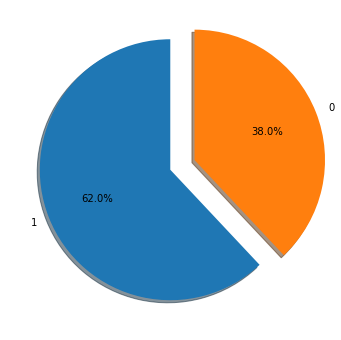

In [19]:
y =  Cancer.diagnosis_result.value_counts()

label = [y.index.tolist()]
plt.pie(y, labels=label[0], shadow=True, explode=(0.0, 0.2), autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)
plt.show()

In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
predict = clf.predict(x_test)

In [23]:
predict

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [24]:
accuracy = accuracy_score(y_test, predict)

In [25]:
accuracy

0.65

In [26]:
patient = clf.predict([[4, 3, 5, 20, 0.2,0.3,0.1,0.898]])

In [27]:
patient

array([1])

In [28]:
joblib.dump(clf, 'ml_Prostate_model.joblib')

['ml_Prostate_model.joblib']